In [2]:
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect
from matplotlib.animation import FuncAnimation

Exercise 1

In [23]:
# defining the function and parameters
f = lambda x: 1 / (1 + np.power(x, 2))
a = -5
b = 5
x = np.linspace(a, b, 1000) # x-axis for plot
infinity_norm_vect1 = list()
infinity_norm_vect2 = list()

# defining the infinity norm
def infinity_norm(f, p_n, x_vect):
    return max(abs(f(x_vect)) - abs(p_n(x_vect)))

1(a) - Runge's Phenomenon

[2.7755575615628914e-17, 3.885780586188048e-16, 1.1129985821867194e-14, 2.2551405187698492e-13, 1.899952417616646e-12, 6.287470544208418e-13, 3.6957872873166764e-10, 2.942091015256665e-15, 5.425243587708906e-13, 1.262960412085068e-07, 5.199566713298687e-08, 2.9976021664879227e-15]


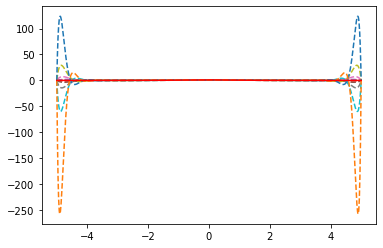

In [24]:

def lagrange(f, x_vect):
    p_n = np.poly1d([0])
    for xk in x_vect:
        l_k = np.poly1d([1])
        for xj in x_vect:
            if xk == xj:
                continue
            p = np.poly1d([1 / (xk - xj), -xj / (xk - xj)])
            l_k *= p
        y = f(xk)
        p_n += l_k * y
    return p_n


for n in range(2, 25, 2):
    x_vect = np.linspace(a, b, n + 1)
    p_n = lagrange(f, x_vect)
    infinity_norm_vect1.append(infinity_norm(f, p_n, x_vect))
    plt.plot(x, p_n(x),linestyle='dashed')
    
print(infinity_norm_vect1)
plt.plot(x, f(x),'r')
plt.show()


1(b) - Chebyshev Polynomials

[0.0, 2.498001805406602e-16, 0.0, 7.385758671318854e-14, 1.1102230246251565e-16, 3.525194025577605e-12, 9.242606680004428e-15, 6.75848266240564e-13, 6.661338147750939e-16, 5.916239720349381e-12, 3.6637359812630166e-15, 3.1484344213544846e-06]


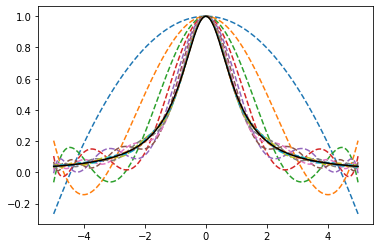

In [25]:
def chebyshev_points(a, b, n):
    cheby = list()
    
    for j in range(1, n + 2):
        t = np.cos(((2*j - 1)*np.pi/(2*n + 2)))
        cheby.append(0.5*(b - a)*t + 0.5*(b + a))
        
    return cheby

for n in range(2, 25, 2):
    x_vect = chebyshev_points(a, b, n)
    p_n = lagrange(f, x_vect)
    infinity_norm_vect2.append(infinity_norm(f, p_n, x_vect))
    plt.plot(x, p_n(x),linestyle='dashed')
    
print(infinity_norm_vect2)
plt.plot(x, f(x), 'k')
plt.show()

Observations:

For Lagrange Interpolation, at equidistant points, the errors are less in the middle but more at the edges for Runge's Phenomenon. <br>
Using Chebyshev Interpolation Points to fit the ploynomial improves the interpolationby a great measuer.

-------------------------------------------------------------------------------------------------------------------------------

Exercise 2

In [27]:
# defining f_t and derivative of f_t as f_prime

f_t = lambda x,t: np.sin(5*np.pi*x)*np.cos(10*np.pi*t) + 2 * np.sin(7*np.pi*x)*np.cos(14*np.pi*t)
f_prime = lambda x,t: 5*np.pi*np.cos(5*np.pi*x)*np.cos(10*np.pi*t) + 14*np.pi*np.cos(7*np.pi*x)*np.cos(14*np.pi*t)

In [28]:
# definining linear splines
def linear_spline(f, x_vect, x, t):
    if x == x_vect[-1]:
        end = len(x_vect) - 1
    else:
        end = bisect(x_vect, x)
    xi = x_vect[end]
    xi_1 = x_vect[end - 1]
    return (((xi - x) / (xi - xi_1)) * f(xi_1, t) + ((x - xi_1) / (xi - xi_1)) * f(xi, t))

In [29]:
# defining natural cubic splines

# first, we need the sigma values
def get_sigma(f, x_vect, t):
    term1 = np.array([x_vect[i] - x_vect[i-1] for i in range(1, len(x_vect) - 1)])
    term2 = np.array([2 * (x_vect[i+1] - x_vect[i-1]) for i in range(1, len(x_vect) - 1)])
    term3 = np.array([x_vect[i+1] - x_vect[i] for i in range(1, len(x_vect) - 1)])
    rhs = np.array([6 * ((f(x_vect[i+1], t) - f(x_vect[i], t) / (x_vect[i+1] - x_vect[i])) - (f(x_vect[i], t) - f(x_vect[i-1], t) / (x_vect[i] - x_vect[i-1]))) for i in range(1, len(x_vect) - 1)])
    l = [0]
    u = [term2[0]]
    y = [rhs[0]]
    for i in range(1, len(x_vect) - 2):
        l.append(term1[i] / u[i-1])
        u.append(term2[i] - l[i] * term3[i-1])
        y.append(rhs[i] - l[i] * y[i-1])
    x = np.zeros(len(x_vect))
    x[-2] = y[-1] / u[-1]
    for i in range(len(x_vect) - 3, 0, -1):
        x[i] = (y[i] - term3[i] * x[i+1]) / u[i]
    return x

# now we define the natural cubic splines
def natural_cubic_spline(f, x_vect, x, t):  
    sigma = get_sigma(f, x_vect, t)
    if x == x_vect[-1]:
        end = len(x_vect) - 1
    else:
        end = bisect(x_vect, x)
    xi = x_vect[end]
    xi_1 = x_vect[end - 1]
    h_i = xi - xi_1
    
    sigma_i = sigma[end]
    sigma_i2 = sigma[end - 1]
    
    alpha = f(xi, t) / h_i - sigma_i * h_i / 6
    beta = f(xi_1, t) / h_i - sigma_i2 * h_i / 6
    
    return (((xi - x)**3 * sigma_i2 / (6 * h_i)) + ((x - xi_1)**3 * sigma_i / (6 * h_i)) + (alpha * (x - xi_1)) + (beta * (xi - x)))

In [30]:
# defining hermite cubic splines
def hermite_cubic_spline(f, f_p, x_vect, x, t):    
    if x == x_vect[-1]:
        end = len(x_vect) - 1
    else:
        end = bisect(x_vect, x)
    xi = x_vect[end]
    xi_1 = x_vect[end - 1]
    h_i = xi - xi_1
    def H_0(x):
        return ((x - xi)**2 / h_i**2) * (1 + 2 * (x - xi_1) / h_i)
    def K_0(x):
        return ((x - xi)**2 / h_i**2) * (x - xi_1)
    def H_1(x):
        return ((x - xi_1)**2 / h_i**2) * (1 - 2 * (x - xi) / h_i)
    def K_1(x):
        return ((x - xi_1)**2 / h_i**2) * (x - xi)
    return (H_0(x) * f(xi_1, t) + K_0(x) * f_p(xi_1, t) + H_1(x) * f(xi, t) + K_1(x) * f_p(xi, t))

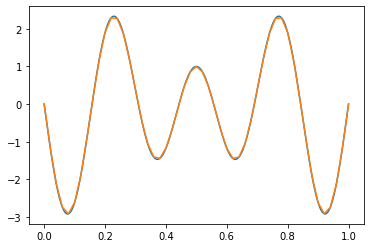

In [31]:
# plotting linear splines
x_vect = [i / 50 for i in range(51)]
x = np.linspace(0, 1, 1000)
t = 0.5

s_l = [linear_spline(f_t, x_vect, x, t) for x in x]

plt.plot(x, f_t(x, t))
plt.plot(x, s_l)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


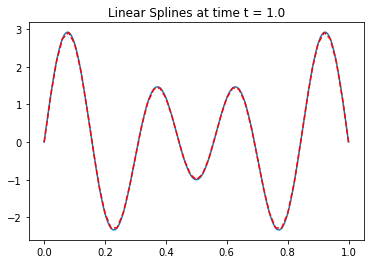

In [32]:
# animation of linear splines
x_vect = [i / 50 for i in range(51)]
t_vect = [i / 50 for i in range(51)]
x = np.linspace(0, 1, 1000)

figure, axis = plt.subplots()

def animate(frame_count):
    t = t_vect[frame_count]
    s_l = [linear_spline(f_t, x_vect, x, t) for x in x]
    plt.gca().cla() 
    axis.plot(x, f_t(x, t))
    axis.plot(x, s_l,'r',linestyle='dashed')
    axis.set_title('Linear Splines at time t = '+ str(t))

anim = FuncAnimation(figure, animate, frames=len(t_vect), interval=200)
anim.save('linear_spline.gif')


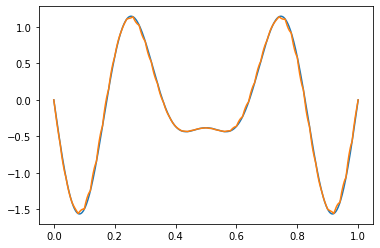

In [33]:
# plotting natural cubic splines
x_vect = [i / 50 for i in range(51)]
x = np.linspace(0, 1, 1000)
t = 0.1

nc_l = [natural_cubic_spline(f_t, x_vect, x, t) for x in x]

plt.plot(x, f_t(x, t))
plt.plot(x, nc_l)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


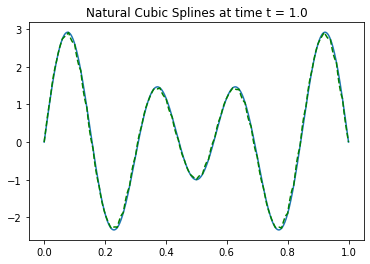

In [34]:
# animating natural cubic splines
x_vect = [i / 50 for i in range(51)]
t_vect = [i / 50 for i in range(51)]
x = np.linspace(0, 1, 1000)

figure, axis = plt.subplots()

def animate(frame_count):
    t = t_vect[frame_count]
    nc_l = [natural_cubic_spline(f_t, x_vect, x, t) for x in x]
    plt.gca().cla() 
    axis.plot(x, f_t(x, t))
    axis.plot(x, nc_l,'g',linestyle='dashed')
    axis.set_title('Natural Cubic Splines at time t = '+ str(t))

anim = FuncAnimation(figure, animate, frames=len(t_vect), interval=200)
anim.save('natural_cubic_spline.gif')

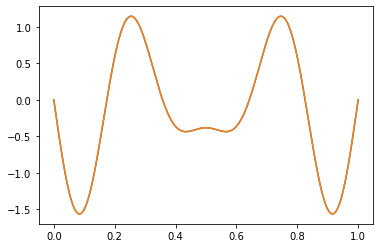

In [35]:
# plotting hermite cubic splines
x_vect = [i / 50 for i in range(51)]
x = np.linspace(0, 1, 1000)
t = 0.1

hc_l = [hermite_cubic_spline(f_t, f_prime, x_vect, x, t) for x in x]

plt.plot(x, f_t(x, t))
plt.plot(x, hc_l)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


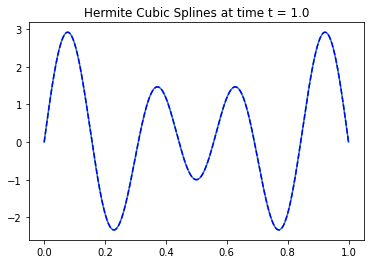

In [36]:
# animating hermite cubic splines
x_vect = [i / 50 for i in range(51)]
t_vect = [i / 50 for i in range(51)]
x = np.linspace(0, 1, 1000)

figure, axis = plt.subplots()

def animate(frame_count):
    t = t_vect[frame_count]
    hc_l = [hermite_cubic_spline(f_t, f_prime, x_vect, x, t) for x in x]
    plt.gca().cla() 
    axis.plot(x, f_t(x, t))
    axis.plot(x, hc_l,'b',linestyle='dashed')
    axis.set_title('Hermite Cubic Splines at time t = '+ str(t))

anim = FuncAnimation(figure, animate, frames=len(t_vect), interval=200)
anim.save('hermite_cubic_spline.gif')